# BE/Bi 103, Fall 2015: Homework 6

## Due 1pm, Monday, November 16

*This document was generated from a Jupyter notebook.  You can download the notebook [here](hw6.ipynb).*

### Problem 6.1: Microtubule catastrophe, 70 pts + 15 pts extra credit

In [Homework 1](hw1.html), we plotted data of microtubule catastrophe times.  In this problem, we return to the data from the [Gardner, Zanic, et al. paper](../protected/papers/gardner_2011.pdf)  We will carefully analyze the data and make some conclusions about the processes underlying microtubule catastrophe.  You can download the data set [here](../protected/data/gardner_hw6.zip).

In the file `gardner_mt_catastrophe_only_tubulin.csv`, we have observed catastrophe times of microtubules with different concentrations of tubulin.  So, our data set $D$ consists of a set of measurements of the amount of time to catastrophe; $D = \{t_i\}$.  To model microtuble catastrophe, we will assume that a series of $m$ processes must occur sequentially to trigger catastrophe.  This could be separate depolymerization events, binding of auxiliary proteins, etc.  We assume that each of these processes is a Poisson process, and that process $j$ occurs with rate $1/\tau_j$.  Our goal here is to do model selection to determine the value of $m$.

As we have learned, the model specifies the likelihood.  We will assume all microtubule catastrophes are independent, so the likelihood for all of our observed catastrophes 

\begin{align}
P(\left\{t_i\right\}\mid \{\tau_j\}, m, I) = \prod_i P(t_i\mid \{\tau_j\}, m, I).
\end{align}

**a)** Explain why the probability distribution for catastrophe times for a three-step process ($m=3$) is

\begin{align}
P(t\mid \tau_1, \tau_2, \tau_3, 3, I) = \frac{1}{\tau_1\tau_2\tau_3}\int_0^t\mathrm{d}t_1 \int_{t_1}^t\mathrm{d}t_2\, \mathrm{e}^{-t_1/\tau_1}\,\mathrm{e}^{-(t_2-t_1)/\tau_2}\,\mathrm{e}^{-(t-t_2)/\tau_3}.
\end{align}

The probability for a single event happening between time t and time t + dt is Poisson distributed:
\begin{align}
P(t_i\mid \tau_i, I)dt &= \lambda_i\mathrm{e}^{-\lambda_i t}dt & \text{where } \lambda_i = \frac{1}{\tau_i}\\
P(t_i\mid \tau_i, I)dt &= \frac{1}{\tau_i}\mathrm{e}^{-\text{time interval}/\tau_i}dt
\end{align}
For the catastrophe to happen, the first event must happen at any time from $t_0$ to $t$. The probability it will happen in the right time interval is:
\begin{align}
P(t_1\mid \tau_i, I) = \int_0^t\mathrm{d}t_1\frac{1}{\tau_1}\mathrm{e}^{-t_1/\tau_1}
\end{align}
For the catastrophe to happen, the second event must happen after $t_1$, so it can happen at any time from $t_1$ to $t$, so the probability it will happen in the right time interval is:
\begin{align}
P(t_2\mid \tau_2, I) = \int_{t_1}^t\mathrm{d}t_2\frac{1}{\tau_2}\mathrm{e}^{-(t_2-t_1)/\tau_2}
\end{align}
For the catastrophe to happen, the third event must happen after $t_2$. It can happen at any time from $t_2$ to $t$, so the probability it will happen in the right time interval is:
\begin{align}
P(t_3\mid \tau_3, I) = \int_{t_2}^t\mathrm{d}t_3\frac{1}{\tau_3}\mathrm{e}^{-(t_3-t_2)/\tau_3}
\end{align}
but we also know that $t_3$ happens at $t_3$, and $t_3 = t$, so in fact:
\begin{align}
P(t_3\mid \tau_3, I) &= \int_{t_3}^t\mathrm{d}t\frac{1}{\tau_3}\mathrm{e}^{-(t_3-t_2)/\tau_3}\\
&= \frac{1}{\tau_3}\mathrm{e}^{-(t-t_2)/\tau_3}
\end{align}
Now:
\begin{align}
P(\left\{t_i\right\}\mid \{\tau_j\}, m, I) = \prod_i P(t_i\mid \{\tau_j\}, m, I).
\end{align}

so
\begin{align}
P(t\mid \tau_1, \tau_2, \tau_3, 3, I) = \frac{1}{\tau_1\tau_2\tau_3}\int_0^t\mathrm{d}t_1 \int_{t_1}^t\mathrm{d}t_2\, \mathrm{e}^{-t_1/\tau_1}\,\mathrm{e}^{-(t_2-t_1)/\tau_2}\,\mathrm{e}^{-(t-t_2)/\tau_3}.
\end{align}


**b)** The above expression for general $m$ can be integrated, giving

\begin{align}
P(t\mid \{\tau_j\}, m, I) = \sum_{j=1}^m \frac{\tau_j^{m-2}\,\mathrm{e}^{-t/\tau_j}}{\prod_{k=1,k\ne j}^m (\tau_j - \tau_k)}.
\end{align}

For clarity, the probability distributions for the first few $m$ are

\begin{align}
P(t\mid \tau_1, 1, I) &= \frac{\mathrm{e}^{-t/\tau_1}}{\tau_1},\\[1em]
P(t\mid \tau_1, \tau_2, 2, I) &=
\frac{\mathrm{e}^{-t/\tau_1}}{\tau_1 - \tau_2} + \frac{\mathrm{e}^{-t/\tau_2}}{\tau_2 - \tau_1}
= \frac{\mathrm{e}^{-t/\tau_2} - \mathrm{e}^{-t/\tau_1}}{\tau_2 - \tau_1} \\[1em]
P(t\mid \tau_1, \tau_2, \tau_3, 3, I) &=
\frac{\tau_1\,\mathrm{e}^{-t/\tau_1}}{(\tau_1 - \tau_2)(\tau_1-\tau_3)}
+\frac{\tau_2\,\mathrm{e}^{-t/\tau_2}}{(\tau_2 - \tau_1)(\tau_2-\tau_3)}
+\frac{\tau_3\,\mathrm{e}^{-t/\tau_3}}{(\tau_3 - \tau_1)(\tau_3-\tau_2)}
\end{align}

Note that these probability distributions assume that no two of the $\tau_j$'s are equal, and you should explicitly ensure this in your calculations.  If any two $\tau_j$'s are equal, you need to take a limit, e.g.,

\begin{align}
\lim_{\tau_2\to\tau_1} P(t\mid \tau_1, \tau_2, 2, I) &= \frac{t^2}{2\tau_1}\,\mathrm{e}^{-t/\tau_1},
\end{align}

in this case, as gamma distribution.  Not to worry; we will not include this limit in our analysis here.

In fact, you should specify $\tau_1 < \tau_2 < \cdots < \tau_m$.  Why is this ok to do, and why should you do it?

#### Why is this OK to do?
The events cannot have the same rates, because the rates are a real number (although the rates can be arbitrarily close to each other!). Even if all the events are the same "type" of event (e.g. hydrolysing GTP 3 times), the rates not be exactly equal.
The mathematics are indifferent to which event is given which label, so we can decide that $\tau_1 < \tau_2 < \cdots < \tau_m$
#### Why should you do it?
We need a positive probability. If $\tau_1 < \tau_2 < \cdots < \tau_m$ is not true then the denominators for some terms in P might go negative, so the overall probability might be negative.

**c)** For the trials where the tubulin concentration is 12 µM (from the file `gardner_mt_catastrophe_only_tubulin.csv`), perform parameter estimation for the $\{\tau_j\}$ and model selection for various values of $m$.  Report the results with clear graphics and discussion.  

*Hint*: Computing the log of the sum of exponentials while dealing with machine precision is a tricky business, and something that comes up often in probability.  Here is my advice.  Say you are computing $\ln(\mathrm{e}^a - \mathrm{e}^b + \mathrm{e}^c)$ with $a>b>c$.  We have

\begin{align}
\ln(\mathrm{e}^a - \mathrm{e}^b + \mathrm{e}^c) = \ln\left(\mathrm{e}^a(1 - \mathrm{e}^{b-a} + \mathrm{e}^{c-a})\right)
= a + \ln(1 - \mathrm{e}^{b-a} + \mathrm{e}^{c-a}).
\end{align}

This latter expression is much easier to compute numerically because all entries in the sum inside the logarithm at less than or equal to one, given that $a$ is the largest argument to the exponentials.  This procedure is implement in `scipy.misc.logsumexp()`. Be sure to check out the `b` kwarg.

In [2]:
import warnings

# Our numerical workhorses
import numpy as np
import pandas as pd

#Differential equation numerical solver
from scipy.integrate import odeint

# Import pyplot for plotting
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d

# Seaborn, useful for graphics
import seaborn as sns

# To compute symbolic expressions
import sympy

# print outputs in LaTeX
sympy.init_printing(use_unicode=True) 

# Interactive manipulations in the notebook
# from ipywidgets import StaticInteract, RangeWidget, RadioWidget
from ipywidgets import interact

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables SVG graphics inline.  There is a bug, so uncomment if it works.
%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style('darkgrid', rc=rc)

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
# define the variable for the time and the number of processes]
# We will also include the j and k from the product
t= sympy.symbols('t')
def p_catastrophe(m=3):
    taus=sympy.symbols('tau:%d'%(m+1))[1:]
    p = list() # initialize list to keep sum terms
    for tau in taus:
        numerator = tau**(m - 2) * sympy.exp(- t / tau)
        denominator = list() # initialize list to keep denominator terms
        for tau_2 in taus:
            if tau_2 != tau:
                denominator.append(tau - tau_2)
        p.append(numerator / np.prod(denominator))
    return np.sum(p)

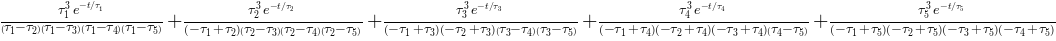

In [46]:
taus = sympy.symbols('tau:6')[1:]
p = []
p_func = []
for i in range(6):
    p.append(p_catastrophe(i))
    
    arg_list = [t]
    [arg_list.append(taus[j]) for j in range(i)]
    p_func.append(sympy.lambdify(arg_list, p[i]))
    
p[5]

In [47]:
p_func[5](5, 1, 2, 3, 4, 5)

**d)** Using whichever model you found most probable when you computed the odds ratio for the 12 µM tubulin measurements, the values of the $\tau_j$'s for the other concentrations of tubulin.  Given that microtubules polymerize faster with higher tubulin concentrations, is there anything you can say about the occurrence of catastrophe by looking at the values of the $\tau_j$'s versus tubulin concentration?

**e) (15 points extra credit)** In the files `gardner_mt_catastrophe_kip3.csv` and `gardner_mt_catastrophe_mcak.csv`, there are measurements of catastrophe times in the presence of the kinesins Kip3 and MCAK with 12 µM tubulin.  Analyze these data and discuss conclusions about their respective roles in microtubule catastrophe.  *Note*: This part of the problem is intentionally open-ended.  You should think carefully, and perform a complete analysis to draw your conclusions.

<br />
<br />

### Problem 6.2: Spike sorting, 30 pts

Dawna and Kyu kindly provided us with another set of voltage measurements from a mouse retina.  You can download the data [here](../data/H930start2filt.txt.zip).  These data have been pre-filtered, so you do not need to do any filtering, unless you think it will help your analysis.  For this trace:

**a)** Locate all spikes.

**b)** There are two types of spikes.  Devise a way to automatically tell the difference between each type of spike.  Plot all of the spikes overlayed on top of each other with their minima at the same point.  The plot should be color-coded so that two classes of spikes have different colors.

**c)** Plot the empirical probability distributions of inter-spike times for each type of spike and comment on anything you see of note.